Data Science Major Project (July- August Batch)                   
Submitted by: Piyush Joshi                                          

Machine Failure Prediction

Importing Pandas, Numpy, Matplotlib and Seaborn.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Data Exploration and Preprocessing

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import VarianceThreshold

In [ ]:
df = pd.read_csv('data.csv')

In [ ]:
df.head()

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
0,0,7,7,1,6,6,36,3,1,1
1,190,1,3,3,5,1,20,4,1,0
2,31,7,2,2,6,1,24,6,1,0
3,83,4,3,4,5,1,28,6,1,0
4,640,7,5,6,4,0,68,6,1,0


In [ ]:
df.shape

(944, 10)

In [ ]:
df.isnull().sum()

,0
footfall,0
tempMode,0
AQ,0
USS,0
CS,0
VOC,0
RP,0
IP,0
Temperature,0
fail,0


In [ ]:
df.describe()

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
count,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000
mean,306.381356,3.727754,4.325212,2.939619,5.394068,2.842161,47.043432,4.565678,16.331568,0.416314
std,1082.606745,2.677235,1.438436,1.383725,1.269349,2.273337,16.423130,1.599287,5.974781,0.493208
min,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,19.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,3.000000,2.000000,5.000000,1.000000,34.000000,3.000000,14.000000,0.000000
50%,22.000000,3.000000,4.000000,3.000000,6.000000,2.000000,44.000000,4.000000,17.000000,0.000000
75%,110.000000,7.000000,6.000000,4.000000,6.000000,5.000000,58.000000,6.000000,21.000000,1.000000
max,7300.000000,7.000000,7.000000,7.000000,7.000000,6.000000,91.000000,7.000000,24.000000,1.000000


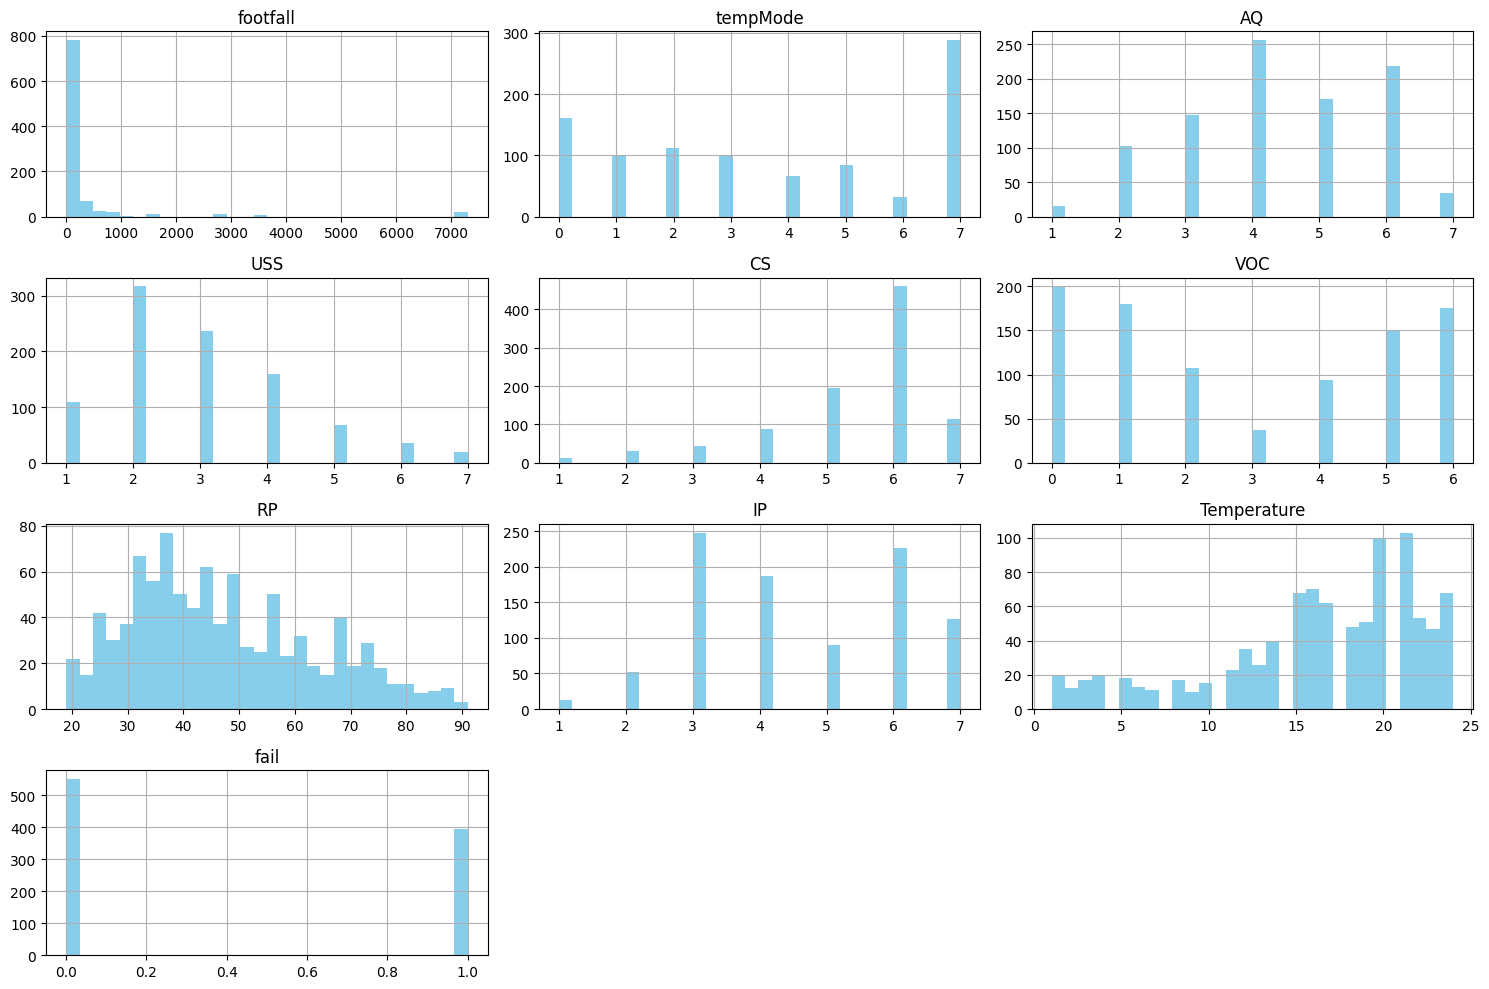

In [ ]:
df.hist(bins=30, figsize=(15,10), color='skyblue')
plt.tight_layout()
plt.show()

Correlation matrix for identifying relationships between variables.

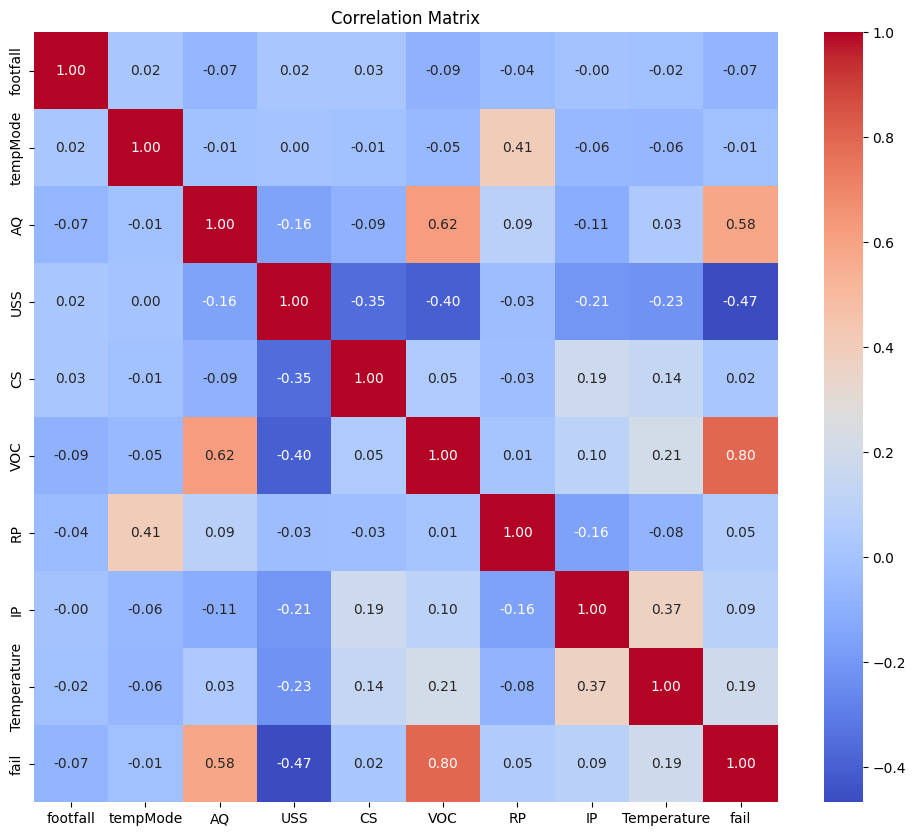

In [ ]:
corr_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Pairplot for identifying relationships between all pairs of variables.

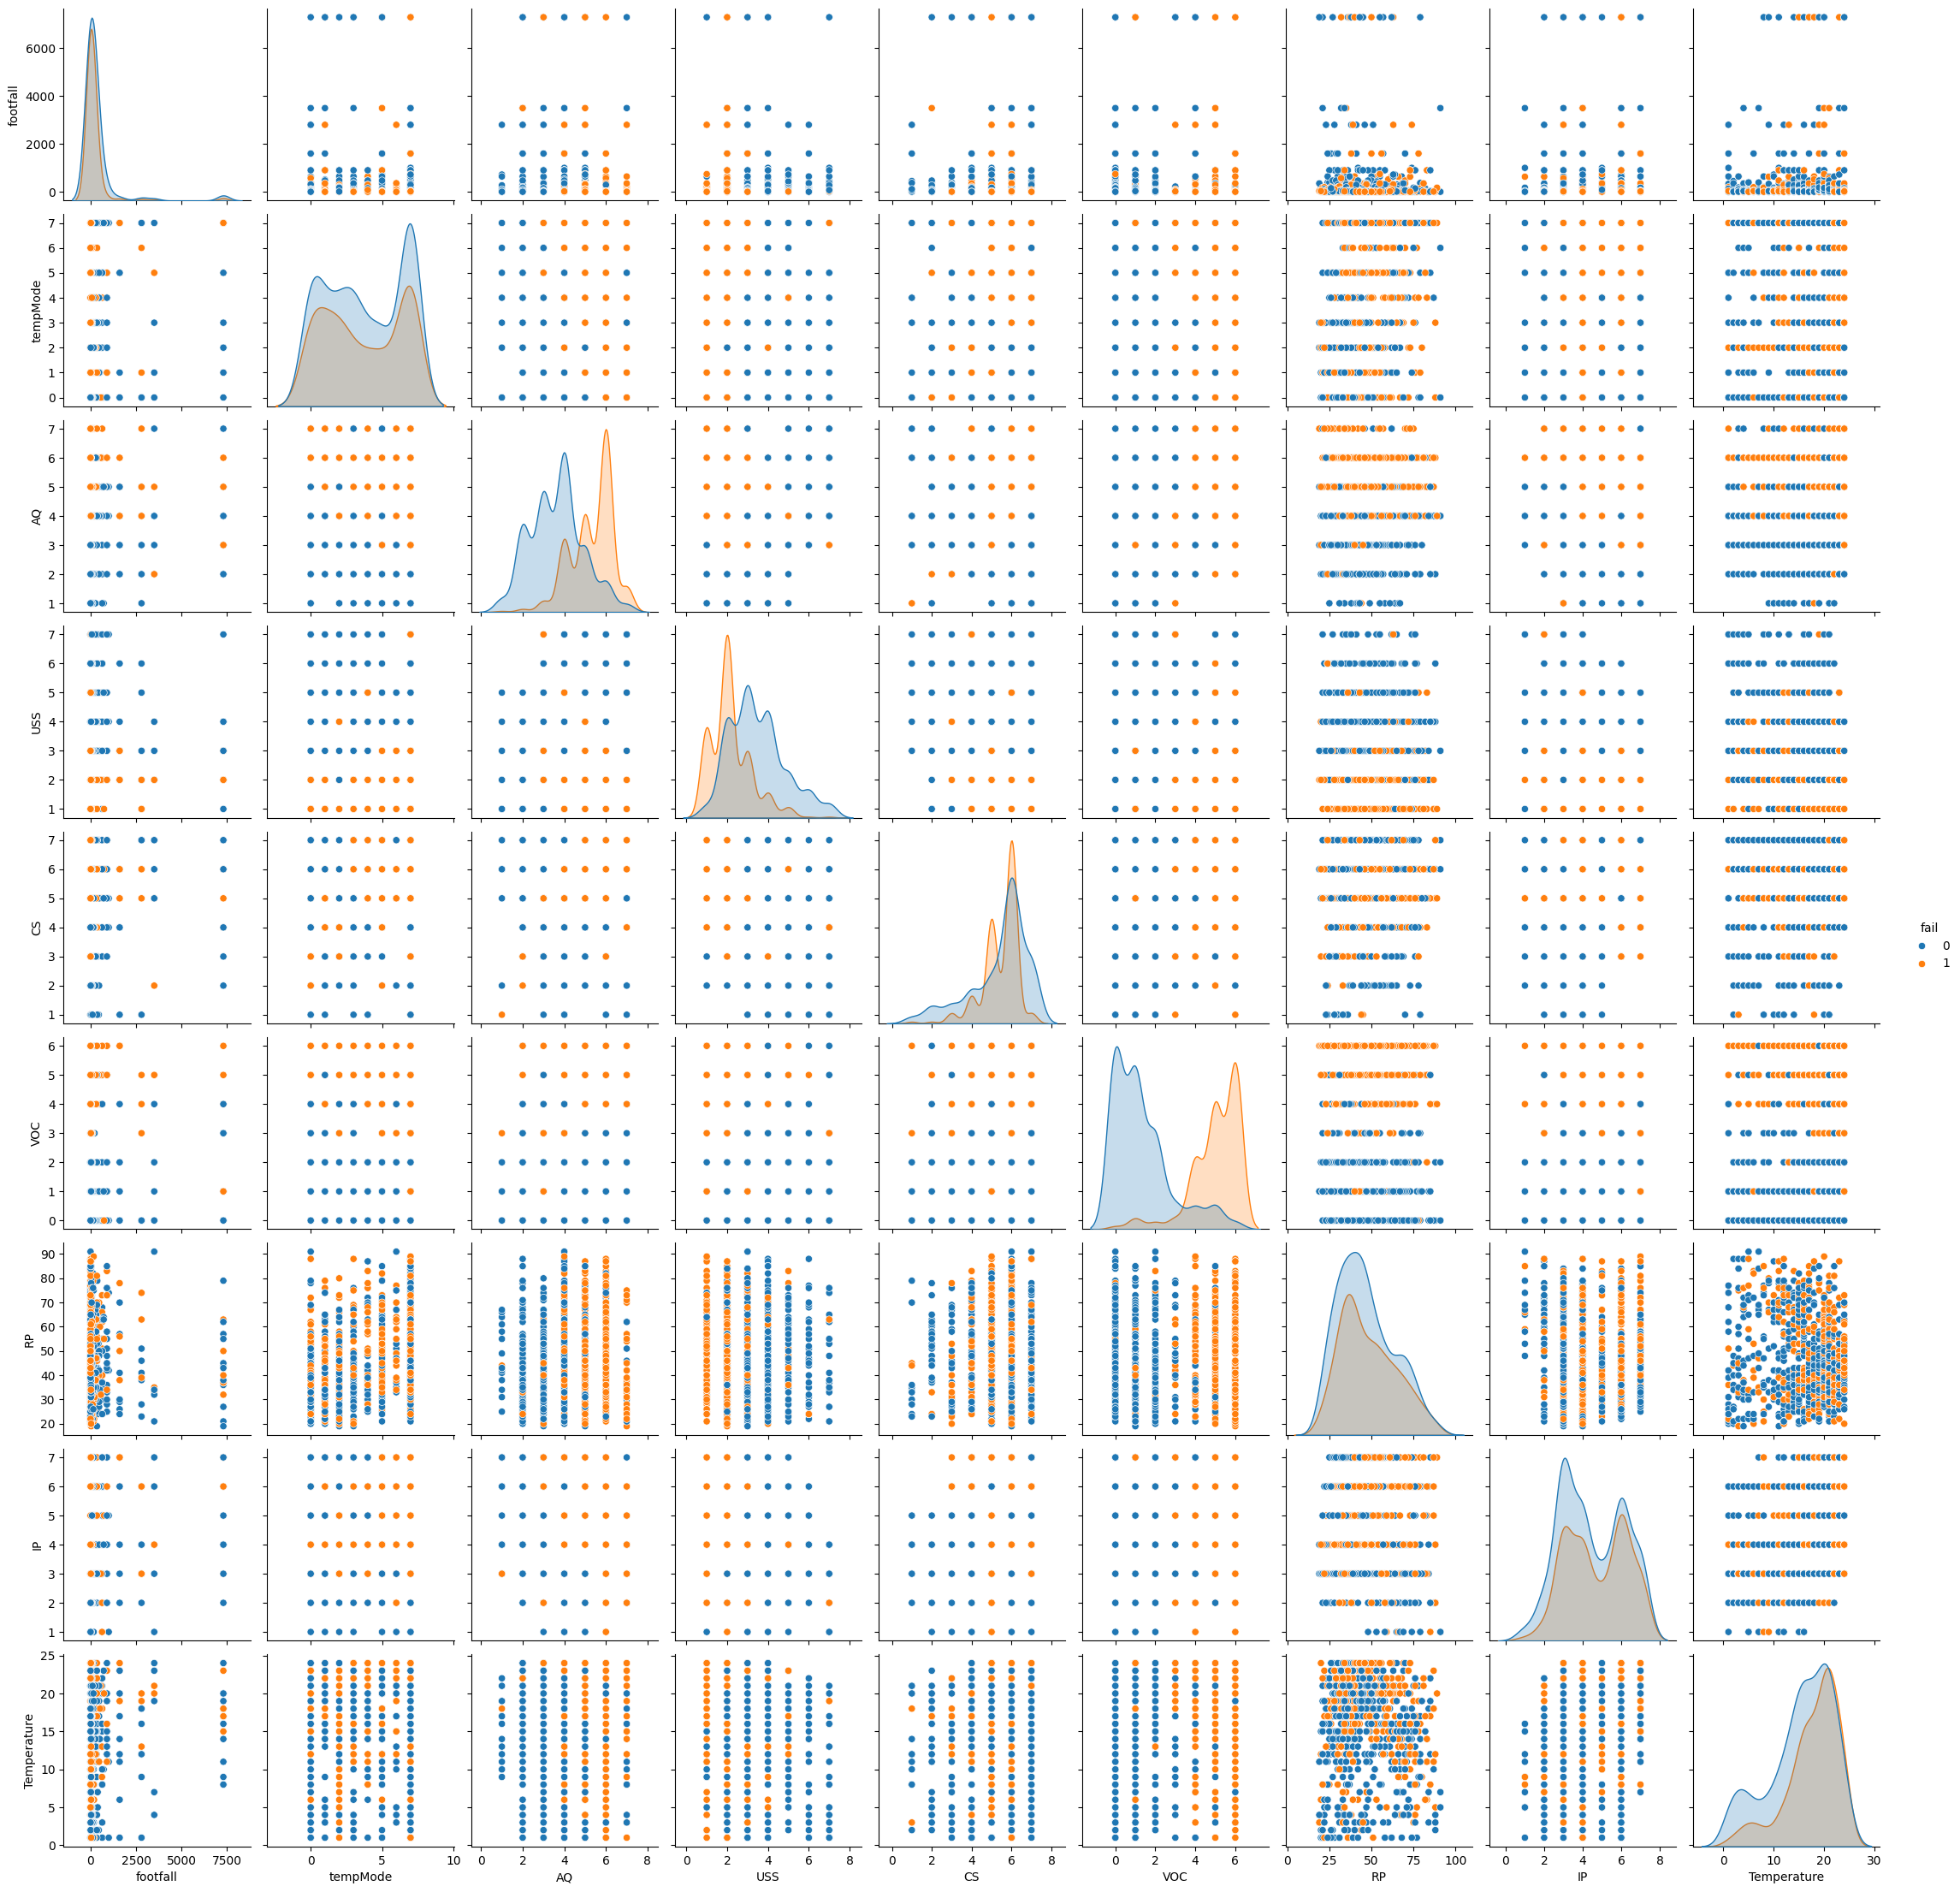

In [ ]:
sns.pairplot(df, hue='fail', vars=['footfall', 'tempMode', 'AQ', 'USS', 'CS', 'VOC', 'RP', 'IP', 'Temperature'])
plt.show()


Scaling all features or variables using Standard Scaler

In [ ]:
numerical_features = ['footfall', 'AQ', 'USS', 'CS', 'VOC', 'RP', 'IP', 'Temperature']

# Initialize the Standard scaler
scaler = StandardScaler()

# Fit and transform the numerical features
df[numerical_features] = scaler.fit_transform(df[numerical_features])

print("\nData after scaling numerical features:")
df.head()



Data after scaling numerical features:


,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
0,-0.283153,7,1.860497,-1.402480,0.477610,1.389813,-0.672788,-0.979504,-2.567407,1
1,-0.107558,1,-0.921775,0.043660,-0.310613,-0.810763,-1.647540,-0.353894,-2.567407,0
2,-0.254504,7,-1.617343,-0.679410,0.477610,-0.810763,-1.403852,0.897327,-2.567407,0
3,-0.206446,4,-0.921775,0.766730,-0.310613,-0.810763,-1.160164,0.897327,-2.567407,0
4,0.308326,7,0.469361,2.212869,-1.098836,-1.250878,1.276716,0.897327,-2.567407,0


In [ ]:
selector = VarianceThreshold(threshold=0)
selector.fit(df.drop('fail', axis=1))

# Get columns that are not removed
features = df.drop('fail', axis=1).columns[selector.get_support()]
print("\nFeatures after removing zero variance:")
print(features)



Features after removing zero variance:
Index(['footfall', 'tempMode', 'AQ', 'USS', 'CS', 'VOC', 'RP', 'IP',
       'Temperature'],
      dtype='object')


Now, beginning with the model training part.

Importing all necessary libraries

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [ ]:
X = df.drop('fail', axis=1)
y = df['fail']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

Using Logistic Regression

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
logreg_accuracy = accuracy_score(y_test, y_pred_logreg)
logreg_f1 = f1_score(y_test, y_pred_logreg)
logreg_auc = roc_auc_score(y_test, y_pred_logreg)
print("Logistic Regression Performance:")
print(f"Accuracy: {logreg_accuracy:.4f}")
print(f"F1 Score: {logreg_f1:.4f}")
print(f"ROC AUC Score: {logreg_auc:.4f}\n")

Logistic Regression Performance:
Accuracy: 0.9225
F1 Score: 0.9083
ROC AUC Score: 0.9227



In [ ]:
print("Confusion Matrix for Random Forest:")
print(confusion_matrix(y_test, y_pred_logreg))

print("\nClassification Report for Random Forest:")
print(classification_report(y_test, y_pred_logreg))

Confusion Matrix for Random Forest:
[[153  13]
 [  9 109]]

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       166
           1       0.89      0.92      0.91       118

    accuracy                           0.92       284
   macro avg       0.92      0.92      0.92       284
weighted avg       0.92      0.92      0.92       284



Using Random Forest

In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)
rf_auc = roc_auc_score(y_test, y_pred_rf)
print("Random Forest Performance:")
print(f"Accuracy: {rf_accuracy:.4f}")
print(f"F1 Score: {rf_f1:.4f}")
print(f"ROC AUC Score: {rf_auc:.4f}\n")

Random Forest Performance:
Accuracy: 0.9366
F1 Score: 0.9250
ROC AUC Score: 0.9372



In [ ]:
print("Confusion Matrix for Random Forest:")
print(confusion_matrix(y_test, y_pred_rf))

print("\nClassification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf))

Confusion Matrix for Random Forest:
[[155  11]
 [  7 111]]

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.96      0.93      0.95       166
           1       0.91      0.94      0.93       118

    accuracy                           0.94       284
   macro avg       0.93      0.94      0.94       284
weighted avg       0.94      0.94      0.94       284



Using Support Vector Machine (SVM)

In [ ]:
svm = SVC(probability=True, random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_f1 = f1_score(y_test, y_pred_svm)
svm_auc = roc_auc_score(y_test, y_pred_svm)
print("Support Vector Machine Performance:")
print(f"Accuracy: {svm_accuracy:.4f}")
print(f"F1 Score: {svm_f1:.4f}")
print(f"ROC AUC Score: {svm_auc:.4f}\n")

Support Vector Machine Performance:
Accuracy: 0.9225
F1 Score: 0.9083
ROC AUC Score: 0.9227



In [ ]:
print("Confusion Matrix for Random Forest:")
print(confusion_matrix(y_test, y_pred_svm))

print("\nClassification Report for Random Forest:")
print(classification_report(y_test, y_pred_svm))

Confusion Matrix for Random Forest:
[[153  13]
 [  9 109]]

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       166
           1       0.89      0.92      0.91       118

    accuracy                           0.92       284
   macro avg       0.92      0.92      0.92       284
weighted avg       0.92      0.92      0.92       284



Comparing the performance of all models.

In [ ]:
model_performance = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'SVM'],
    'Accuracy': [logreg_accuracy, rf_accuracy, svm_accuracy],
    'F1 Score': [logreg_f1, rf_f1, svm_f1,],
    'ROC AUC Score': [logreg_auc, rf_auc, svm_auc]
})

print("Model Performance Comparison:")
print(model_performance.sort_values(by='F1 Score', ascending=False))


Model Performance Comparison:
                 Model  Accuracy  F1 Score  ROC AUC Score
1        Random Forest  0.936620  0.925000       0.937206
0  Logistic Regression  0.922535  0.908333       0.922708
2                  SVM  0.922535  0.908333       0.922708


We got the best performance by using the Random Forest model, with following results:                                                                        
Random Forest: (Accuracy)0.936620, (F1 Score)0.925000, (ROC AUC Score)0.937206.